<a href="https://colab.research.google.com/github/CesarSanchez89/Robot-Trading/blob/main/Robot_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Configuración del Ambiente



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from urllib.request import urlopen
from bs4 import BeautifulSoup
from IPython.display import clear_output
import time
import requests


In [ ]:

!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.11
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.22.4
------
Name: matplotlib
Version: 3.7.1


In [2]:
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  tickerStrings = ['BTC-USD']
  df_bitcoin = yf.download(tickerStrings, group_by='Ticker', period='7d', interval='5m')
  return df_bitcoin


In [7]:
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
  url = "https://coinmarketcap.com/"
  respuesta = requests.get(url, headers=headers)
  soup = BeautifulSoup(respuesta.content, features='lxml')

  info = soup.find('div', class_='sc-cadad039-0 clgqXO')
  precio = info.find('span').get_text()
  precio_list=precio.split('$')
  precio_list1=precio_list[1].split(',')
  precio_list1[0]+precio_list1[1]
  precio_actual= float(precio_list1[0]+precio_list1[1])
  info2= soup.find('span', class_='sc-97d6d2ca-0 cYiHal')
  porcentaje = info2.span['class']
  if(porcentaje[0]=='icon-Caret-up'):
    tendencia='alta'
  elif(porcentaje[0]=='icon-Caret-down'):
    tendencia='baja'
  return tendencia



In [8]:
def limpieza_datos():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio1 = df_bitcoin_limpio[df_bitcoin_limpio['Volume']>0]
  precio = df_bitcoin_limpio1['Close']
  Q1 = precio.quantile(.25)
  Q3 = precio.quantile(.75)
  IIQ = Q3 -Q1
  limite_inferior = Q1 - 1.5*IIQ
  limite_superior = Q3 + 1.5*IIQ
  seleccion = ((precio >= limite_inferior) & (precio <= limite_superior))
  close_new = df_bitcoin_limpio1[seleccion]
  media_bitcoin = close_new['Close'].mean()
  return media_bitcoin


In [9]:
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  if((precio_actual >= media_bitcoin)&(tendencia=='baja')):
    algoritmo_decision = 'Vender'
  elif((precio_actual < media_bitcoin)&(tendencia=='alta')):
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = ''
  return algoritmo_decision


In [18]:
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin['Promedio'] = media_bitcoin
  plt.rc('figure', figsize = (16,5))
  plt.plot(df_bitcoin['Close'])
  plt.plot(df_bitcoin['Promedio'])
  plt.annotate(algoritmo_decision,  xy=(0.9, 0.9), xycoords="axes fraction")
  plt.title('BITCOIN')
  plt.ylabel('BTC-USD')
  plt.xlabel('FECHA')
  plt.show()

[*********************100%***********************]  1 of 1 completed


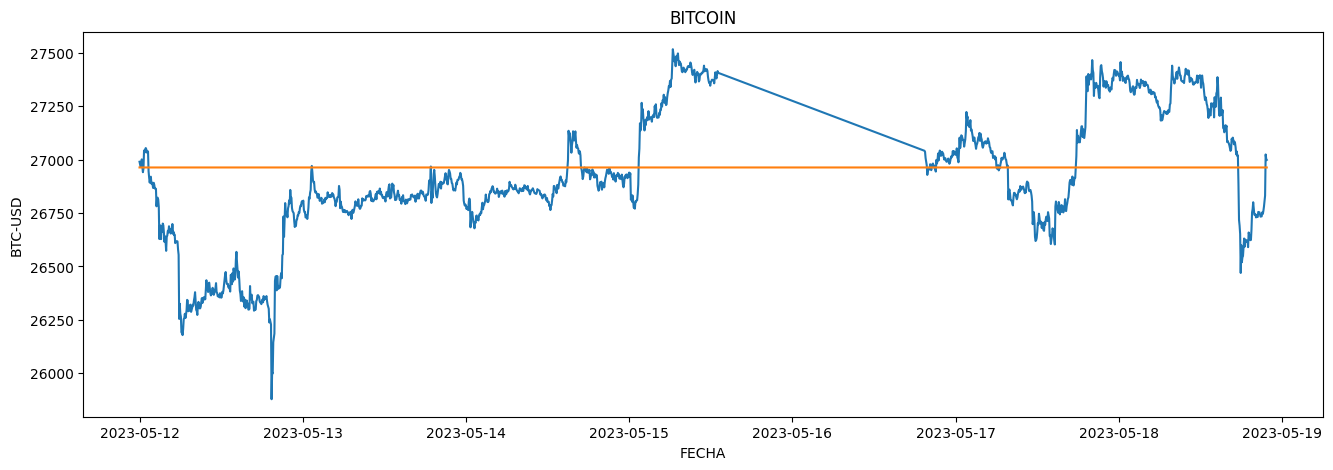

KeyboardInterrupt: ignored

In [19]:
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)